In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

import tensorflow as tf

import gpflow
from gpflow.utilities import read_values, multiple_assign, set_trainable
from gpflow.inducing_variables import InducingPoints
import gpmaniflow
from gpmaniflow.models.SVGP import SVGP

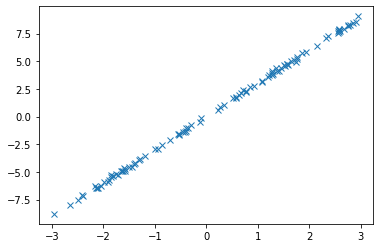

In [2]:
pX = np.linspace(-5.0, 5.0, 300)[:, None]
X = np.random.uniform(-3, 3, 100)[:, None]
Y = 3 * X + np.random.randn(*X.shape) * 0.1
Z = np.linspace(-5, 5, 50)[:, None]

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

plt.plot(X,Y ,"x")

In [3]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(2000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))


Step: 0, Mini batch elbo: -1440.789815156586
Step: 50, Mini batch elbo: -551.9681832241124
Step: 100, Mini batch elbo: -199.10068023603725
Step: 150, Mini batch elbo: -157.77935794938983
Step: 200, Mini batch elbo: -150.22195943695053
Step: 250, Mini batch elbo: -147.06338707928793
Step: 300, Mini batch elbo: -144.3345276895277
Step: 350, Mini batch elbo: -141.81985968037415
Step: 400, Mini batch elbo: -139.27320926495642
Step: 450, Mini batch elbo: -136.5910522414063
Step: 500, Mini batch elbo: -133.73258105713586
Step: 550, Mini batch elbo: -130.7034977560503
Step: 600, Mini batch elbo: -127.33284137618385
Step: 650, Mini batch elbo: -123.71574732698816
Step: 700, Mini batch elbo: -119.80163732586385
Step: 750, Mini batch elbo: -115.50889783190507
Step: 800, Mini batch elbo: -110.89539325885906
Step: 850, Mini batch elbo: -105.90781518729057
Step: 900, Mini batch elbo: -100.81363032897794
Step: 950, Mini batch elbo: -94.46413215025409
Step: 1000, Mini batch elbo: -87.79050531713504
S

In [4]:
import gpmaniflow.samplers
from gpmaniflow.samplers import initialize_sampler

In [5]:
model.MatheronSampler = initialize_sampler()

I'm here


In [6]:
out1 = model.MatheronSampler(pX)
model.MatheronSampler = initialize_sampler()
out2 = model.MatheronSampler(pX)
out3 = model.MatheronSampler(pX)
out2 - out3

I'm here


<tf.Tensor: shape=(1, 300, 1), dtype=float64, numpy=
array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [

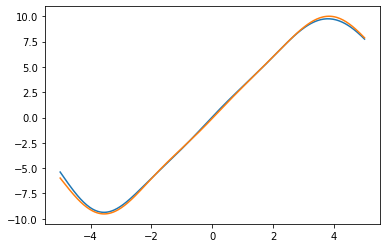

In [7]:
plt.plot(pX, out1[0,:,0])
plt.plot(pX, out2[0,:,0])

In [8]:
model.MatheronSampler = initialize_sampler(from_df = True)

I'm here


(300, 512)
(300, 50)


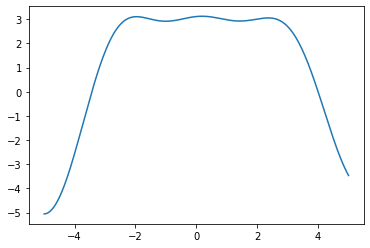

In [9]:
dout = model.MatheronSampler(pX)
plt.plot(pX, dout[0,:,0])

# 2-dimensional input

In [10]:
pX = np.reshape(np.random.uniform(-2, 2, 200*2), [200, 2])
X = np.random.uniform(-3, 3, 200*2)[:, None]
X = np.reshape(X, [200, 2])
Y = 2 * X[:,0] + 1 * X[:,1] + np.random.randn(200) * 0.1
Y = np.reshape(Y, [200,1])
Z = np.random.uniform(-3, 3, 100*2)[:, None]
Z = np.reshape(Z, [100, 2])

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

print(Y.shape)
#plt.plot(X,Y ,"x")

(200, 1)


In [11]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(3000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))

Step: 0, Mini batch elbo: -1924.8886475061918
Step: 50, Mini batch elbo: -872.3805917586285
Step: 100, Mini batch elbo: -410.38341384111516
Step: 150, Mini batch elbo: -323.2508394483887
Step: 200, Mini batch elbo: -306.2302188724704
Step: 250, Mini batch elbo: -294.16857244975114
Step: 300, Mini batch elbo: -284.12550238625647
Step: 350, Mini batch elbo: -274.90314803060477
Step: 400, Mini batch elbo: -265.8325568791207
Step: 450, Mini batch elbo: -256.5499506154446
Step: 500, Mini batch elbo: -246.78440465907573
Step: 550, Mini batch elbo: -236.37612767167914
Step: 600, Mini batch elbo: -225.04048375958763
Step: 650, Mini batch elbo: -212.73437882595334
Step: 700, Mini batch elbo: -199.43834549261015
Step: 750, Mini batch elbo: -184.26911769901577
Step: 800, Mini batch elbo: -167.7006820698443
Step: 850, Mini batch elbo: -149.54069601591138
Step: 900, Mini batch elbo: -129.75358881568695
Step: 950, Mini batch elbo: -108.55754282737227
Step: 1000, Mini batch elbo: -86.06608581057455
S

In [12]:
model.MatheronSampler = initialize_sampler(from_df = True)

I'm here


(400, 512)
(400, 100)


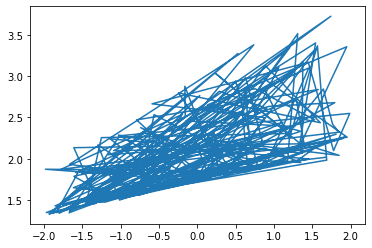

In [14]:
dout = model.MatheronSampler(pX)
dout.shape
plt.plot(pX[:,0], dout[0,:,0,0])
# Verify results of this matheron